# TOPIC: PREDICTING ENERGY CONSUMPTION
I want to train a model to predict energy consumption in different states based on energy usage in months and years

**LOADING DATASET**


In [105]:
import pandas as pd
data=pd.read_csv("consumers.csv")


**creating coppy of the dataset this will help to recover the dataset if we ruin it**

**checking format of data**

**checking number of rows**

In [106]:
#creating coppy of the dataset this will help to recover the dataset if we ruin it
data1=data.copy()


#checking data format
data_format=data1.head()
print(f"data format: {data_format}") #it is wide format becuase each row represent unique observation and each variable has each variable
print()


#checking total number of rows and column using "shape" atribute
rows_andcolumn_numbers=data1.shape
print(f" number of column and rows: {rows_andcolumn_numbers}")# we have (2160, 15) for rows and column in dataset1

data format:      STATES        JAN        FEV        MAR        ABR        MAI        JUN  \
0  Rondônia   44271.00   41823.00   40309.00   41622.00   42819.80   39615.50   
1      Acre   15778.13   14807.61   14970.25   15545.48   14714.96   13650.97   
2  Amazonas   84473.00   79776.66   75028.00   75997.24   79165.00   76363.00   
3   Roraima   15606.65   14793.02   14460.54   15416.93   13129.88   13541.43   
4      Pará  141170.69  133722.24  129019.65  145309.27  137324.54  141204.56   

         JUL        AGO        SET        OUT        NOV        DEZ  YEAR  \
0   40586.00   39354.00   42564.00   45081.00   44687.00   42843.00  2004   
1   14831.92   14965.91   15749.94   16636.93   16815.59   16169.22  2004   
2   78969.00   79171.48   86117.99   82395.72   86089.23   83190.81  2004   
3   13255.62   12645.36   14174.85   15158.62   15655.56   15434.34  2004   
4  135724.37  146423.11  141929.93  142047.33  149190.18  148314.53  2004   

  CONSUMER_TYPE  
0   Residencial  
1

**checking data types using infor() function**

In [107]:
# checking data types in each column in the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATES         2160 non-null   object 
 1   JAN            2160 non-null   float64
 2   FEV            2160 non-null   float64
 3   MAR            2160 non-null   float64
 4   ABR            2160 non-null   float64
 5   MAI            2160 non-null   float64
 6   JUN            2160 non-null   float64
 7   JUL            2052 non-null   float64
 8   AGO            2052 non-null   float64
 9   SET            2052 non-null   float64
 10  OUT            2052 non-null   float64
 11  NOV            2052 non-null   float64
 12  DEZ            2052 non-null   float64
 13  YEAR           2160 non-null   int64  
 14  CONSUMER_TYPE  2160 non-null   object 
dtypes: float64(12), int64(1), object(2)
memory usage: 253.2+ KB


# checking for missing values in the dataset
# summing all the null values withing the dataset
# Filling the missing values in specific column with constant value in spesfic row

In [108]:
# checking for missing values in the dataset
nullvalues_in_column=data1.isnull().sum() # it gives column name and the missing values and there is 
print(nullvalues_in_column)
print()

data2=data1.copy() #creating coppy

# summing all the null values withing the dataset 
null_sum=data2.isnull().sum().sum()
print(f"total number of missing values is:{null_sum}")
print()




# Filling the missing values in specific numerical column with column mean of each column
data2.fillna(data2.mean(), inplace=True) # you can see numerical columns are filled 


STATES             0
JAN                0
FEV                0
MAR                0
ABR                0
MAI                0
JUN                0
JUL              108
AGO              108
SET              108
OUT              108
NOV              108
DEZ              108
YEAR               0
CONSUMER_TYPE      0
dtype: int64

total number of missing values is:648



/tmp/ipykernel_8763/331279230.py:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.fillna(data2.mean(), inplace=True) # you can see numerical columns are filled


# showing filled dataset in all columns and checking if there is still other missing values

In [109]:
#checking if dataset still have missing values
data2.isnull().sum()#  we can conclude that all the missing values are removed

STATES           0
JAN              0
FEV              0
MAR              0
ABR              0
MAI              0
JUN              0
JUL              0
AGO              0
SET              0
OUT              0
NOV              0
DEZ              0
YEAR             0
CONSUMER_TYPE    0
dtype: int64

# dropping other column that are not needed
dropping column of consumer type becuase it will not affect annything and can not be used in predicting


In [110]:
# Creating a copy of data1
data3 = data2.copy()

# Dropping the "CONSUMER_TYPE" column
data3.drop(columns=["CONSUMER_TYPE"], inplace=True)

# Display the first few rows to confirm the column has been dropped
data3.head(8)


STATES        JAN        FEV        MAR        ABR        MAI  \
0   Rondônia   44271.00   41823.00   40309.00   41622.00   42819.80   
1       Acre   15778.13   14807.61   14970.25   15545.48   14714.96   
2   Amazonas   84473.00   79776.66   75028.00   75997.24   79165.00   
3    Roraima   15606.65   14793.02   14460.54   15416.93   13129.88   
4       Pará  141170.69  133722.24  129019.65  145309.27  137324.54   
5      Amapá   21780.00   14494.00   21722.00   18904.00   18143.00   
6  Tocantins   25505.31   23986.15   24727.93   26979.94   26857.73   
7   Maranhão   88613.00   81144.00   84537.00   87326.00   87117.38   

         JUN        JUL        AGO        SET        OUT        NOV  \
0   39615.50   40586.00   39354.00   42564.00   45081.00   44687.00   
1   13650.97   14831.92   14965.91   15749.94   16636.93   16815.59   
2   76363.00   78969.00   79171.48   86117.99   82395.72   86089.23   
3   13541.43   13255.62   12645.36   14174.85   15158.62   15655.56   
4  141204.56  135724.37  146423.11  141929.93  142047.33  149190.18   
5   19502.00   19440.00   19717.00   20994.00   22521.00   22269.00   
6   28211.76   25616.15   26559.50   29928.58   29366.04   27572.80   
7   86473.00   84032.37   87593.00   91369.98   89662.72   89720.66   

         DEZ  YEAR  
0   42843.00  2004  
1   16169.22  2004  
2   83190.81  2004  
3   15434.34  2004  
4  148314.53  2004  
5   22649.00  2004  
6   27292.80  2004  
7   88175.02  2004

# dealing with outliers
1. **visualising outliers with boxplots** of each month column 

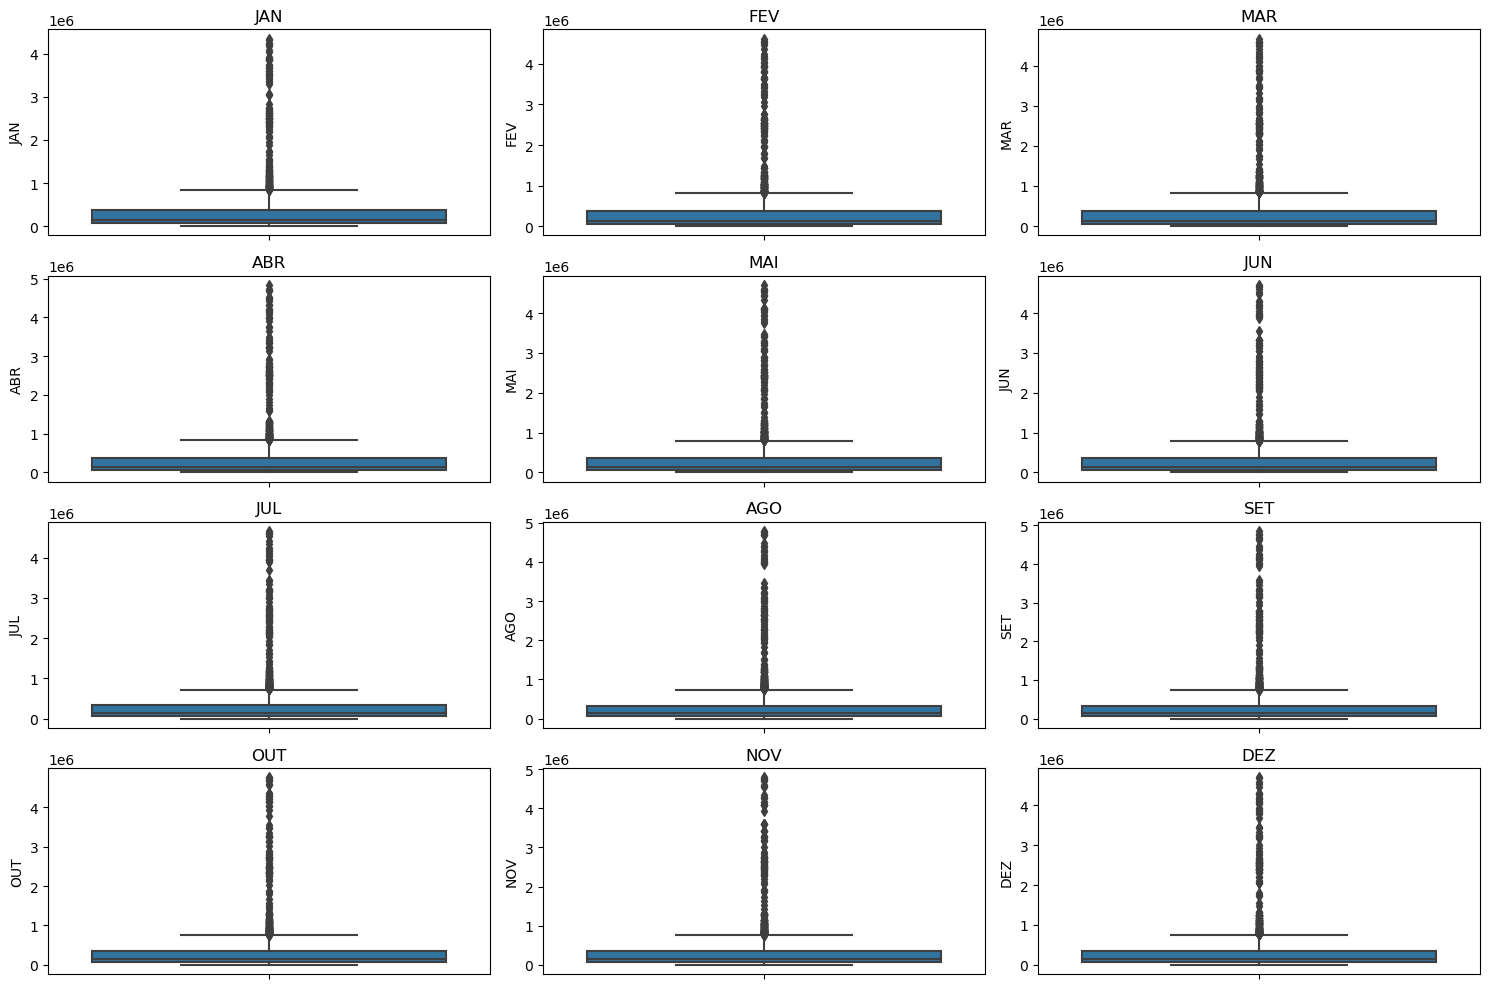

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot in the dataset
columns_to_plot = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Number of columns and rows for subplots
n_cols = 3
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Plot each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(y=data3[column], ax=ax)
    ax.set_title(column)

# If there are any unused subplots, remove them
for ax in axes.flatten()[len(columns_to_plot):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


**removing outliers using interquartile range(IQR),upper bound and lower bound of each column** 

here you find lower bound and upper bound of each column then we replace the number in the column if it is greater than upper bound or less than lower bound with mean() of the column

In [113]:
import numpy as np
data4=data3.copy()

#Function to replace outliers with the mean of the column using IQR
def replace_outliers_with_mean_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = np.where(df[column] > upper_bound, df[column].mean(), df[column])
        df[column] = np.where(df[column] < lower_bound, df[column].mean(), df[column])
        
    return df

# List of columns to process
columns_to_process = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]
data4 = replace_outliers_with_mean_iqr(data4, columns_to_process)

# visualising data with removed outliers

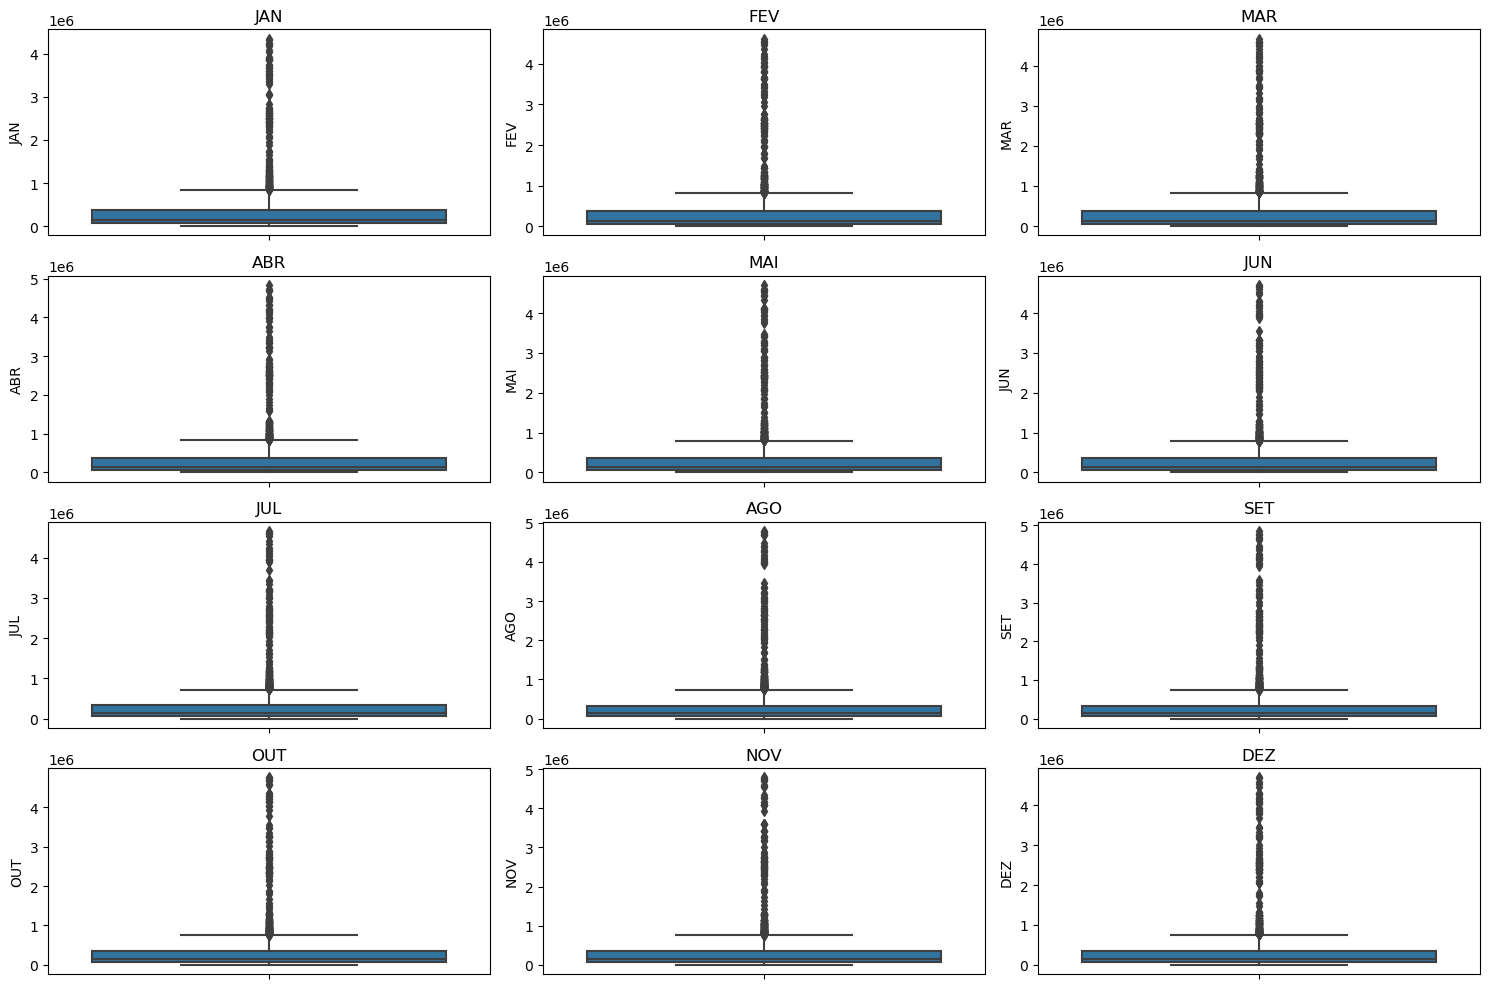

In [114]:

# List of columns to plot in the dataset
columns_to_plot = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Number of columns and rows for subplots
n_cols = 3
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Plot each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(y=data3[column], ax=ax)
    ax.set_title(column)

# If there are any unused subplots, remove them
for ax in axes.flatten()[len(columns_to_plot):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()
# graphs before and after removing outliers are similar then I can conclude that there's no outliers in this dataset

# dealing with duplicated rows or rows that are multiple of other rows
**checking duplicates**

**removing duplicated rows**


In [115]:
data5=data4.copy()


#checking duplicates
duplicate_rows=data5.duplicated()
print(duplicate_rows)


#removing duplicated rows
duplicat_removed=data5.drop_duplicates()#removed them to have unique rows and remained row and column are" 2085 x 14 columns
print(duplicat_removed)


0       False
1       False
2       False
3       False
4       False
        ...  
2155    False
2156    False
2157    False
2158    False
2159    False
Length: 2160, dtype: bool
                  STATES        JAN         FEV        MAR        ABR  \
0               Rondônia   44271.00   41823.000   40309.00   41622.00   
1                   Acre   15778.13   14807.610   14970.25   15545.48   
2               Amazonas   84473.00   79776.660   75028.00   75997.24   
3                Roraima   15606.65   14793.020   14460.54   15416.93   
4                   Pará  141170.69  133722.240  129019.65  145309.27   
...                  ...        ...         ...        ...        ...   
2155   Rio Grande do Sul  609108.95  621037.380  600190.67  560158.19   
2156  Mato Grosso do Sul  109413.50  105612.140  107980.86  115704.69   
2157         Mato Grosso  161896.33  166744.050  185165.96  182295.22   
2158               Goiás  237006.92  229544.960  245250.05  271775.68   
2159    Distrito 

# transforming the numericals columns to have  mean of 0 and a standard deviation of 1 by using z-score normalization 
I have used StandardScaler by importing it from sklearn.preprocessing package

In [116]:
data6=data5.copy()


# Importing stardard scaler
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# List of columns to transform
columns_to_transform = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Applying the scaler only to the specified columns listed above 
data6[columns_to_transform] = scaler.fit_transform(data6[columns_to_transform])

# Viewing transformed data
print(data6.head())

     STATES       JAN       FEV       MAR       ABR       MAI       JUN  \
0  Rondônia -0.827755 -0.838071 -0.857029 -0.852842 -0.863143 -0.876841   
1      Acre -0.969765 -0.976653 -0.985539 -0.987082 -1.018300 -1.022497   
2  Amazonas -0.627387 -0.643378 -0.680946 -0.675880 -0.662493 -0.670695   
3   Roraima -0.970620 -0.976728 -0.988124 -0.987744 -1.027051 -1.023111   
4      Pará -0.344803 -0.366651 -0.407118 -0.319065 -0.341414 -0.306948   

        JUL       AGO       SET       OUT       NOV       DEZ  YEAR  
0 -0.950682 -0.969680 -0.958594 -0.953305 -0.950872 -0.955621  2004  
1 -1.111665 -1.119269 -1.120261 -1.122299 -1.114113 -1.111202  2004  
2 -0.710759 -0.725452 -0.695998 -0.731608 -0.708383 -0.720282  2004  
3 -1.121518 -1.133502 -1.129758 -1.131082 -1.120907 -1.115488  2004  
4 -0.355993 -0.312951 -0.359497 -0.377200 -0.338805 -0.340433  2004  


# creating two  new variables 
1. **Total Energy Consumption for the Year (TOTAL_CONSUMPTION)**
   
   This variable will be the sum of the monthly consumption values for each row.
2. **Average Monthly Consumption (AVERAGE_CONSUMPTION)**

   This variable will be the average of the monthly consumption values for each row

In [117]:
data7=data6.copy()

# List of columns to use for the new variables
columns_to_use = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Create the new variables
data7["TOTAL_CONSUMPTION"] = data7[columns_to_use].sum(axis=1)
data7["AVERAGE_CONSUMPTION"] = data7[columns_to_use].mean(axis=1)

# Viewing dataset with new added columns
print(data7.head())


     STATES       JAN       FEV       MAR       ABR       MAI       JUN  \
0  Rondônia -0.827755 -0.838071 -0.857029 -0.852842 -0.863143 -0.876841   
1      Acre -0.969765 -0.976653 -0.985539 -0.987082 -1.018300 -1.022497   
2  Amazonas -0.627387 -0.643378 -0.680946 -0.675880 -0.662493 -0.670695   
3   Roraima -0.970620 -0.976728 -0.988124 -0.987744 -1.027051 -1.023111   
4      Pará -0.344803 -0.366651 -0.407118 -0.319065 -0.341414 -0.306948   

        JUL       AGO       SET       OUT       NOV       DEZ  YEAR  \
0 -0.950682 -0.969680 -0.958594 -0.953305 -0.950872 -0.955621  2004   
1 -1.111665 -1.119269 -1.120261 -1.122299 -1.114113 -1.111202  2004   
2 -0.710759 -0.725452 -0.695998 -0.731608 -0.708383 -0.720282  2004   
3 -1.121518 -1.133502 -1.129758 -1.131082 -1.120907 -1.115488  2004   
4 -0.355993 -0.312951 -0.359497 -0.377200 -0.338805 -0.340433  2004   

   TOTAL_CONSUMPTION  AVERAGE_CONSUMPTION  
0         -10.854434            -0.904536  
1         -12.658645            -1

# encoding categorical variable
this is changing variable values or string  to represent numbers this increase generalisation of model

**changing column named "STATES" values into numbers**

In [118]:
data8=data7.copy()
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()


# Fit and transform the 'Name' column
data8["STATES"] = label_encoder.fit_transform(data8["STATES"])


# Display the DataFrame to verify the changes

data8.head()


STATES       JAN       FEV       MAR       ABR       MAI       JUN  \
0      21 -0.827755 -0.838071 -0.857029 -0.852842 -0.863143 -0.876841   
1       0 -0.969765 -0.976653 -0.985539 -0.987082 -1.018300 -1.022497   
2       3 -0.627387 -0.643378 -0.680946 -0.675880 -0.662493 -0.670695   
3      22 -0.970620 -0.976728 -0.988124 -0.987744 -1.027051 -1.023111   
4      15 -0.344803 -0.366651 -0.407118 -0.319065 -0.341414 -0.306948   

        JUL       AGO       SET       OUT       NOV       DEZ  YEAR  \
0 -0.950682 -0.969680 -0.958594 -0.953305 -0.950872 -0.955621  2004   
1 -1.111665 -1.119269 -1.120261 -1.122299 -1.114113 -1.111202  2004   
2 -0.710759 -0.725452 -0.695998 -0.731608 -0.708383 -0.720282  2004   
3 -1.121518 -1.133502 -1.129758 -1.131082 -1.120907 -1.115488  2004   
4 -0.355993 -0.312951 -0.359497 -0.377200 -0.338805 -0.340433  2004   

   TOTAL_CONSUMPTION  AVERAGE_CONSUMPTION  
0         -10.854434            -0.904536  
1         -12.658645            -1.054887  
2          -8.253260            -0.687772  
3         -12.725633            -1.060469  
4          -4.170878            -0.347573

#  exploratory data analysis
1. **finding summary statistics**

this is finding mean, average, standard deviation, max, min and etc

In [119]:
import matplotlib.pyplot as plt

# showing summery statistics in numerical column excluding encoded categorical column
# List of numerical columns (excluding encoded categorical variables)
numerical_columns = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ", "TOTAL_CONSUMPTION", "AVERAGE_CONSUMPTION"]

# Generate summary statistics for only the numerical columns
summary_statistics = data8[numerical_columns].describe()

# Display the summary statistics
print(summary_statistics)

               JAN          FEV           MAR           ABR           MAI  \
count  2160.000000  2160.000000  2.160000e+03  2.160000e+03  2.160000e+03   
mean      0.000000     0.000000  1.052656e-16 -7.894919e-17 -2.631640e-17   
std       1.000232     1.000232  1.000232e+00  1.000232e+00  1.000232e+00   
min      -1.042941    -1.050797 -1.055349e+00 -1.062783e+00 -1.092735e+00   
25%      -0.744408    -0.746713 -7.534874e-01 -7.563163e-01 -7.678510e-01   
50%      -0.388117    -0.375891 -3.676938e-01 -3.703477e-01 -3.545850e-01   
75%       0.639809     0.675949  6.929172e-01  6.922499e-01  7.414327e-01   
max       3.136490     3.125834  3.179848e+00  3.237781e+00  3.311226e+00   

                JUN           JUL           AGO           SET          OUT  \
count  2.160000e+03  2.160000e+03  2.160000e+03  2.160000e+03  2160.000000   
mean   3.947460e-17 -1.052656e-16 -2.368476e-16 -1.315820e-17     0.000000   
std    1.000232e+00  1.000232e+00  1.000232e+00  1.000232e+00     1.0002

# DATA VISUALIZATION 
we use lotlib.pyplot and seaborn packages for visualisation

2. **Histograms**

Histograms are useful for understanding the distribution of individual column.

it is showing energy consumption in each month

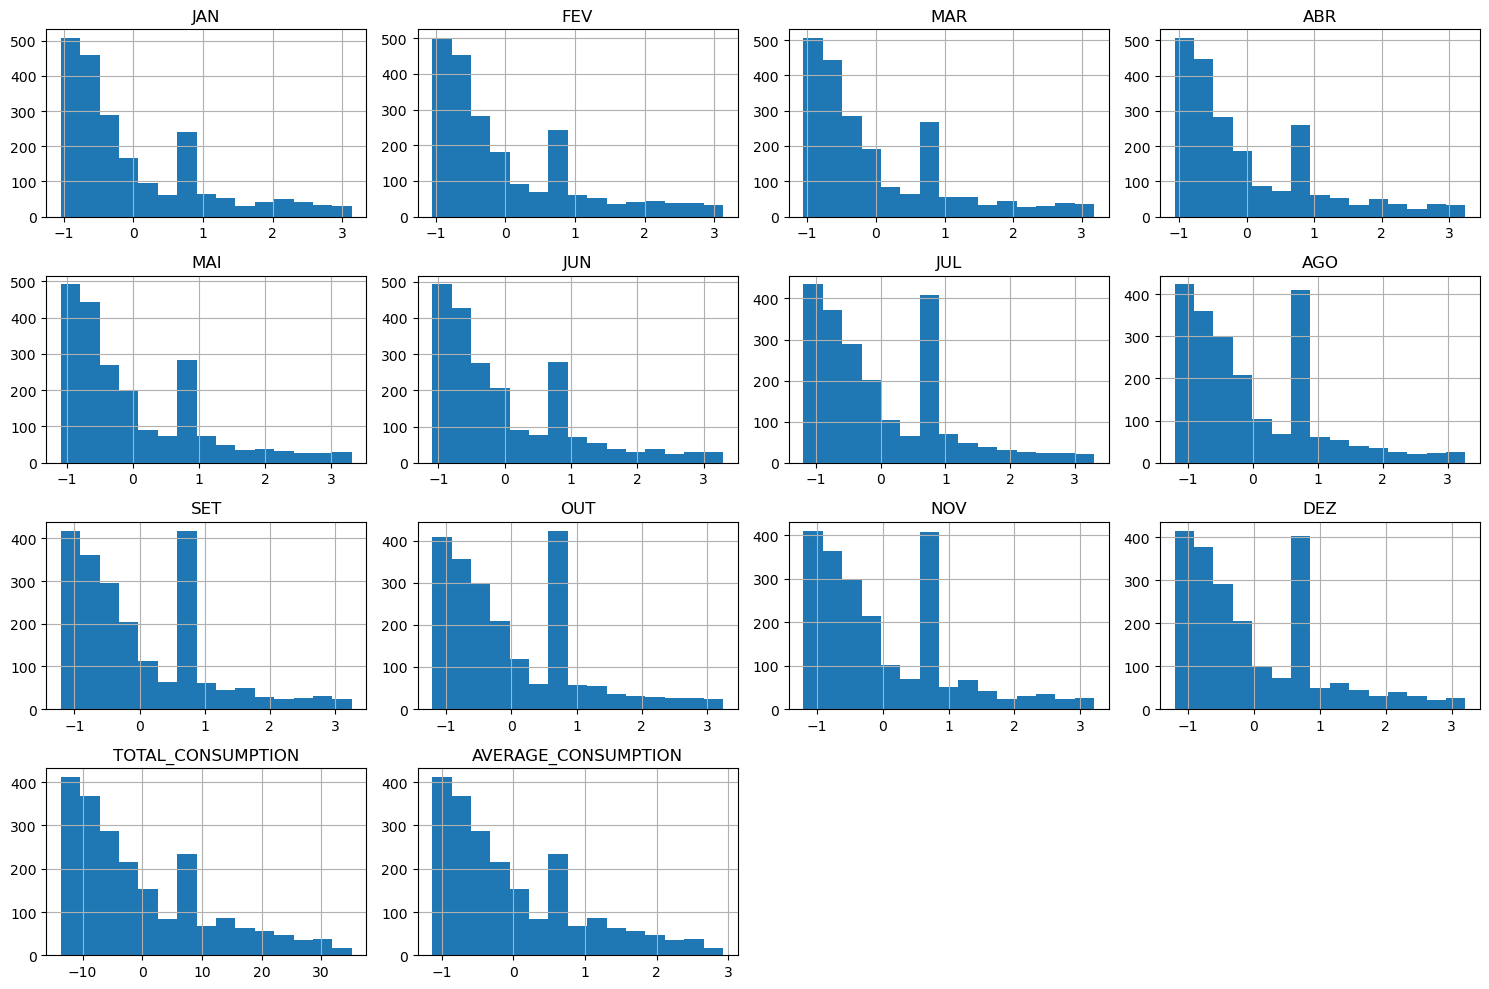

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for the specified numerical columns
data8[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


2. **Boxplot**

  it is used to show outliers and spred of the column or the skweness


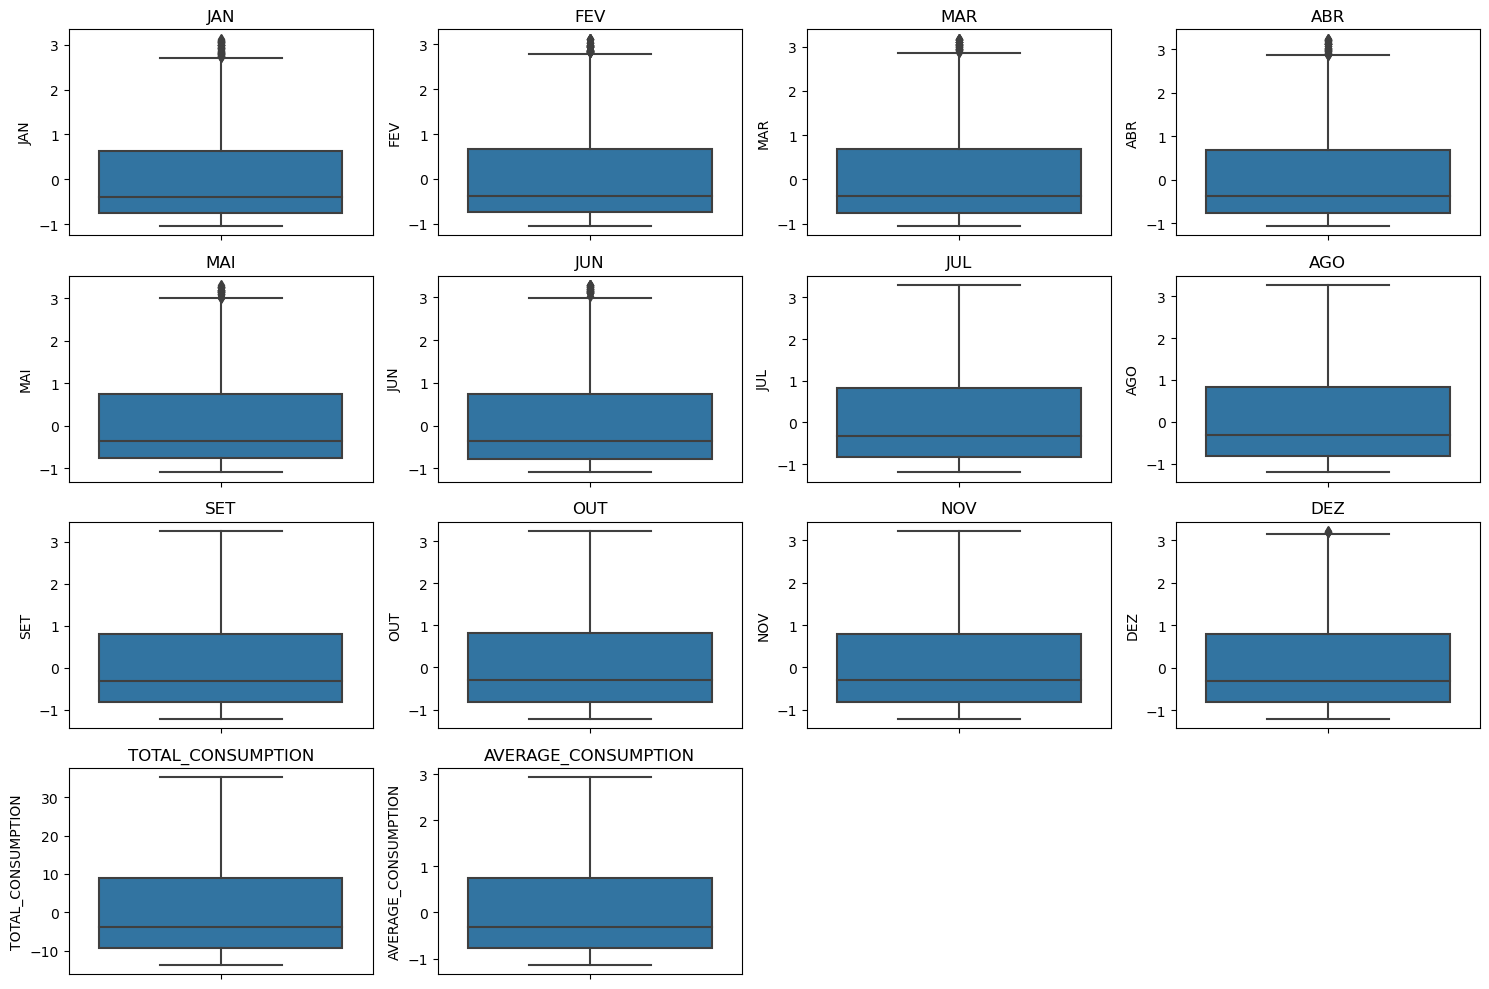

In [121]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()

for ax, column in zip(axes, numerical_columns):
    sns.boxplot(y=data8[column], ax=ax)
    ax.set_title(column)


for ax in axes[len(numerical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


3. **Correlation Matrix**

A correlation matrix helps understand the relationships between numerical columns

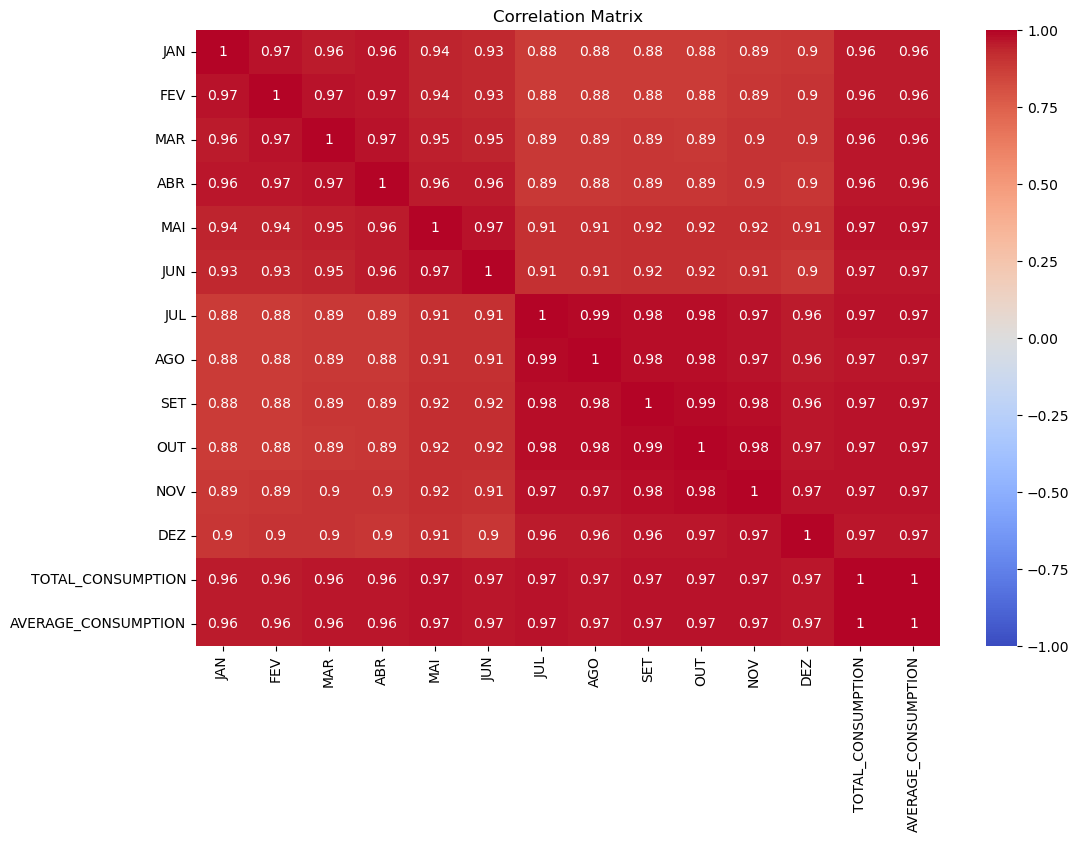

In [124]:
# Compute the correlation matrix
correlation_matrix = data8[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


3. **pair Plots**

Pair plots provide scatter plots for each pair of numerical columns, useful for identifying relationships and patterns.

to view it cleary double click the image it will be zoomed automatically

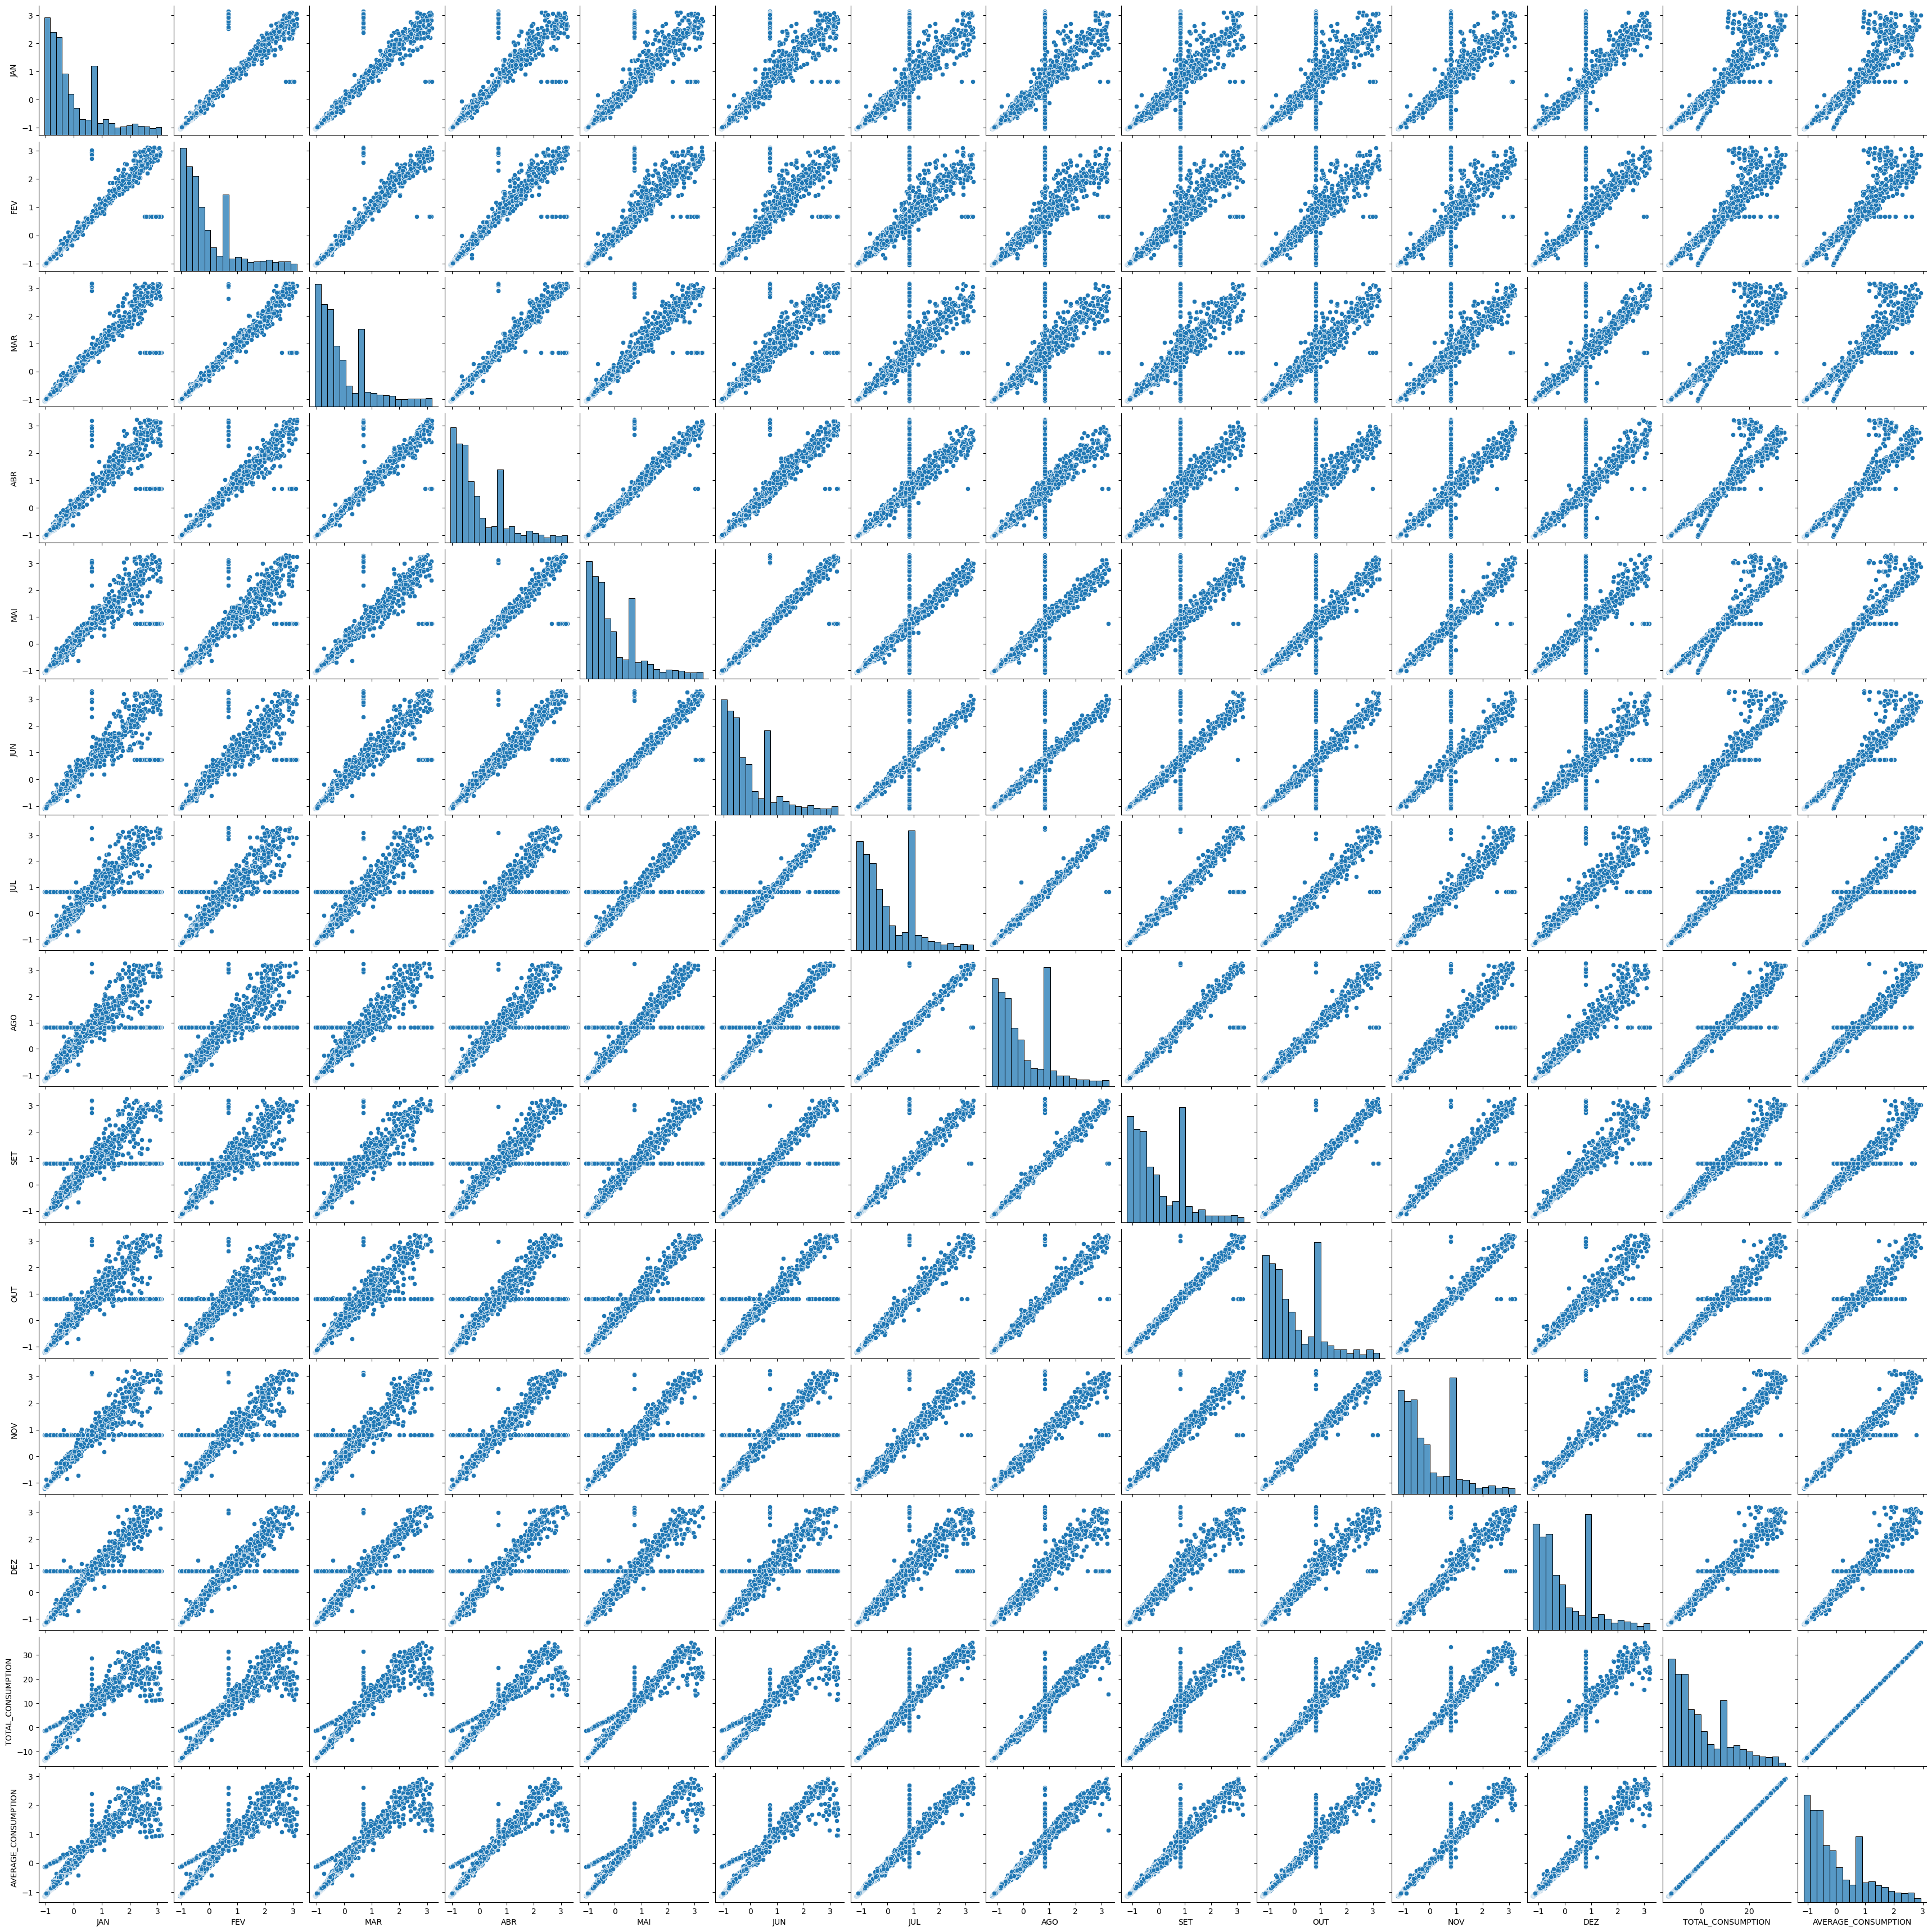

In [126]:

# Plotting pair plots for numerical columns
sns.pairplot(data8[numerical_columns])
plt.show()


# saving the transformed data to csv format

In [127]:

transformed_file_path = "transformed_dataset_of_energy_consumption.csv"

# Save the transformed dataset to a CSV file
data8.to_csv(transformed_file_path, index=False)

print(f"Transformed dataset saved to {transformed_file_path}")


Transformed dataset saved to transformed_dataset_of_energy_consumption.csv
